<a href="https://colab.research.google.com/github/ManviGumber08/101412099_COMP_3123_assignment2/blob/master/LabWeek2/LabWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression as a Single Neuron Model

## Imports

In [1]:
import numpy as np
import h5py
import requests
import os
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def download_file(url, local_filename):
    """
    Downloads a file from a URL and saves it locally.
    """
    if not os.path.exists(local_filename):
        print(f"Downloading {local_filename}...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_filename, 'wb') as f:
                f.write(response.content)
            print(f"File downloaded: {local_filename}")
        else:
            raise Exception(f"Failed to download file from {url}. Status code: {response.status_code}")
    else:
        print(f"File already exists: {local_filename}")

def load_dataset():
    # URLs of the .h5 files
    train_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/train_catvnoncat.h5'
    test_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/test_catvnoncat.h5'

    # Local file paths
    train_file = 'train_catvnoncat.h5'
    test_file = 'test_catvnoncat.h5'

    # Download the files if not already present
    download_file(train_url, train_file)
    download_file(test_url, test_file)

    # Open the files using h5py
    train_dataset = h5py.File(train_file, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Train set labels

    test_dataset = h5py.File(test_file, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # Test set labels

    classes = np.array(test_dataset["list_classes"][:])  # List of classes

    # Reshape labels
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Importing Dataset

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

File downloaded: train_catvnoncat.h5
File downloaded: test_catvnoncat.h5


## Data Visualization

label:  [1]


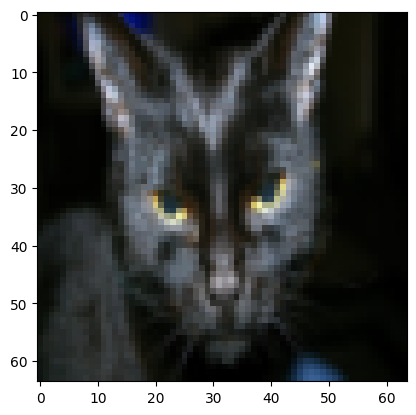

In [4]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

### **Exercise 1:** Take a look at five different images in test set. Try to see both cat and non-cat samples.

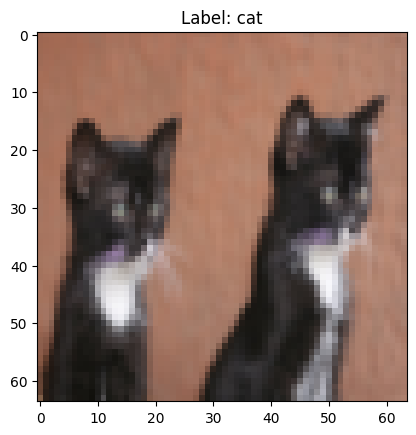

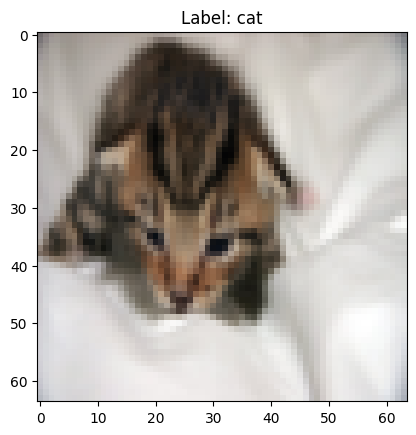

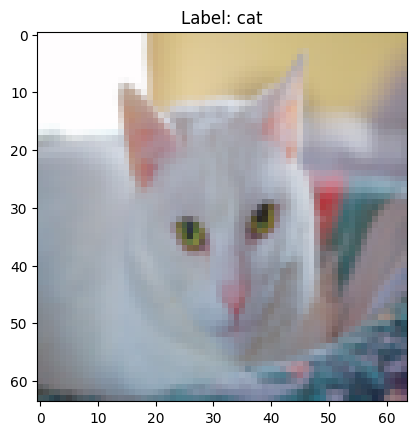

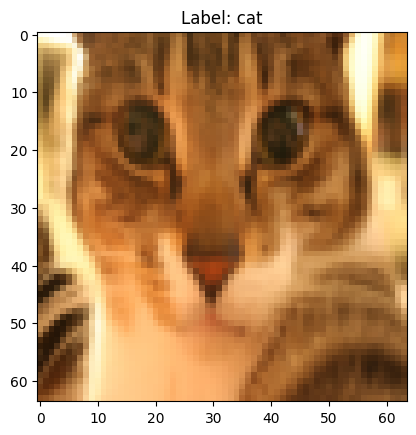

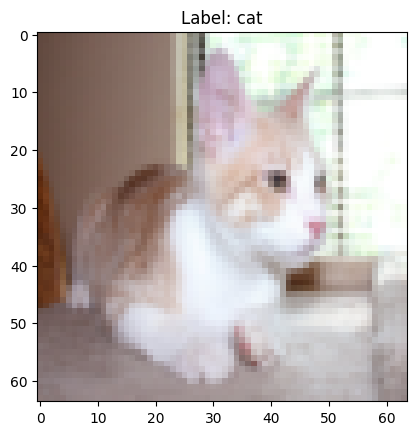

In [5]:
# Display five different images with their labels
for i in range(5):  # Loop to show 5 images
    plt.figure()
    plt.imshow(test_set_x_orig[i])  # Display the image
    label = "cat" if test_set_y[0, i] == 1 else "non-cat"
    plt.title(f"Label: {label}")  # Show label
    plt.show()


### **Exercise 2:** What percentage of the pictures contain cats?

In [6]:
# Total number of test samples
total_samples = test_set_y.shape[1]

# Number of cat images (label == 1)
cat_images = np.sum(test_set_y)

# Percentage calculation
cat_percentage = (cat_images / total_samples) * 100

print(f"Percentage of pictures containing cats: {cat_percentage:.2f}%")


Percentage of pictures containing cats: 66.00%


## Data Preprocessing

### Numerical Representation of Images

![preprocessing](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imvectorkiank.png)

### Simple Numerical Example

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imtovec_example.webp)

In [ ]:
airplane_image = np.array([[[255, 123, 135],[44, 12, 15],[56, 87, 90]],[[255, 133, 175],[24, 123, 169],[98, 66, 77]],[[66, 54, 88 ],[55, 98, 54],[87, 142, 89]]])
print(airplane_image.shape)
print(airplane_image)

(3, 3, 3)
[[[255 123 135]
  [ 44  12  15]
  [ 56  87  90]]

 [[255 133 175]
  [ 24 123 169]
  [ 98  66  77]]

 [[ 66  54  88]
  [ 55  98  54]
  [ 87 142  89]]]


In [ ]:
airplane_flatten = airplane_image.flatten()
print(airplane_flatten.shape)
print(airplane_flatten)

(27,)
[255 123 135  44  12  15  56  87  90 255 133 175  24 123 169  98  66  77
  66  54  88  55  98  54  87 142  89]


### **Exercise 3:** Check the shape of the train and test datasets along with their labels. Try to interpret the numbers in the shapes.

**Notes:**
- The images are 64x64 `pixels`.
- There are 3 RGB `channels`.
- The train set contains 209 `batches` of images, and the test set contains 50 `batches` of images.

In [7]:
# Checking the shapes of the datasets and their labels
print(f"Shape of train set images: {train_set_x_orig.shape}")
print(f"Shape of train set labels: {train_set_y.shape}")
print(f"Shape of test set images: {test_set_x_orig.shape}")
print(f"Shape of test set labels: {test_set_y.shape}")


Shape of train set images: (209, 64, 64, 3)
Shape of train set labels: (1, 209)
Shape of test set images: (50, 64, 64, 3)
Shape of test set labels: (1, 50)


### Flattening the Train and Test Datasets

In [8]:
train_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
print(train_flat.shape)

test_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
print(test_flat.shape)

train_label = train_set_y[0]
print(train_label.shape)

test_label = test_set_y[0]
print(test_label.shape)



(209, 12288)
(50, 12288)
(209,)
(50,)


### Exercise 4: Why the dimension of flattened image is 12288?

## Implementing Logistic Regression

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/LogReg_kiank.png)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### **Exercise 5:** Train a `LogisticRegression` classifier to run a binary classification on the flattened cat pictures.

In [12]:


# Flatten the train and test datasets
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T / 255.0
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T / 255.0

# Convert labels to a compatible shape (flatten)
train_set_y_flatten = train_set_y.flatten()
test_set_y_flatten = test_set_y.flatten()

# Initialize and train the Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(train_set_x_flatten.T, train_set_y_flatten)

# Predict on the test set
test_predictions = clf.predict(test_set_x_flatten.T)

# Evaluate the accuracy
test_accuracy = accuracy_score(test_set_y_flatten, test_predictions)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 70.00%


### **Exercise 6:** Evaluate your model manually

1. Choose a random index of an image.
2. Display the image.
3. Print the original label.
4. Print the predicted label.
5. Repeat this process multiple times to identify which pictures are more challenging for the model.

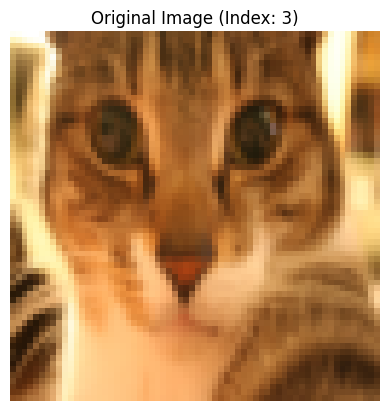

Original Label: cat
Predicted Label: cat



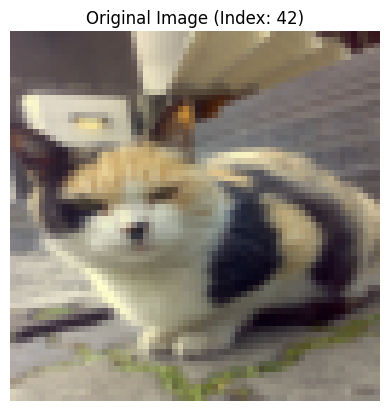

Original Label: cat
Predicted Label: cat



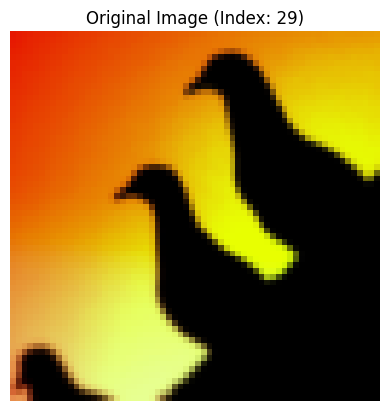

Original Label: non-cat
Predicted Label: cat



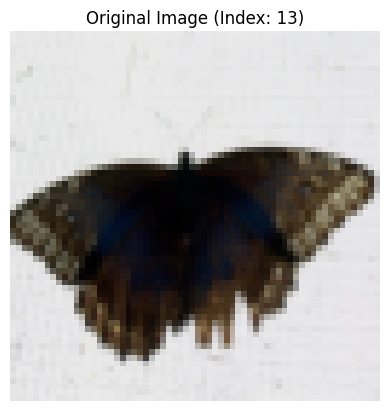

Original Label: non-cat
Predicted Label: cat



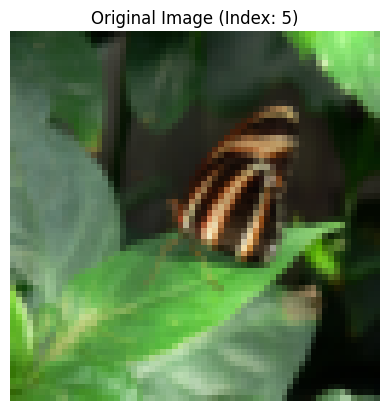

Original Label: non-cat
Predicted Label: non-cat



In [14]:


# Function to manually evaluate the model
def evaluate_model_manually(num_samples=5):
    for _ in range(num_samples):
        # Choose a random index from the test set
        index = random.randint(0, test_set_x_orig.shape[0] - 1)

        # Display the image
        plt.imshow(test_set_x_orig[index])
        plt.title(f"Original Image (Index: {index})")
        plt.axis('off')
        plt.show()

        # Print the original label
        original_label = "cat" if test_set_y[0, index] == 1 else "non-cat"
        print(f"Original Label: {original_label}")

        # Predict the label
        flattened_image = test_set_x_orig[index].reshape(1, -1) / 255.0  # Normalize the image
        predicted_label = "cat" if clf.predict(flattened_image)[0] == 1 else "non-cat"
        print(f"Predicted Label: {predicted_label}\n")

# Call the function to evaluate the model
evaluate_model_manually(num_samples=5)


### **Exercise 7:** Report the overall accuracy of your classifier.

In [16]:


# Predict the labels for the test set
test_predictions = clf.predict(test_set_x_flatten.T)

# Calculate the accuracy
test_accuracy = accuracy_score(test_set_y_flatten, test_predictions)

# Report the overall accuracy
print(f"Overall Accuracy of the Classifier: {test_accuracy * 100:.2f}%")


Overall Accuracy of the Classifier: 70.00%


## MNIST dataset (Optional)

In [17]:
#import mnist dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

Label:  8
Image Shape:  (28, 28)


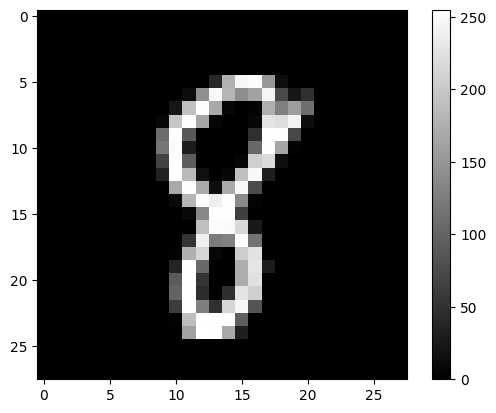

In [ ]:
#Note: Run this cell multiple times
index = np.random.randint(0, x_train.shape[0])
print("Label: ", y_train[index])
print("Image Shape: ", x_train[index].shape)
plt.imshow(x_train[index], cmap='gray')
plt.colorbar()

### **Excercise 8:** What is the difference between a black-and-white image and a color image in terms of numerical representation?

Black-and-White (Grayscale) Image:

A black-and-white image is represented as a 2D matrix of pixel intensity values.
Each pixel has a single value that represents its intensity, typically ranging from 0 (black) to 255 (white).
Color Image:

A color image is represented as a 3D matrix, where each pixel has three values corresponding to the Red, Green, and Blue (RGB) channels.
Each channel is a 2D matrix of intensity values ranging from 0 to 255.


### **Exercise 9:** Select one data sample and flatten it. What is the size of the flattened image and why?

In [18]:
# Select one data sample (e.g., index 0)
sample_image = train_set_x_orig[0]

# Flatten the image
flattened_image = sample_image.flatten()

# Print the size of the flattened image and why
print(f"Original Shape: {sample_image.shape}")
print(f"Flattened Shape: {flattened_image.shape}")


Original Shape: (64, 64, 3)
Flattened Shape: (12288,)


### **Excercise 10:** Flatten the Entire Train and Test Datasets

In [19]:
# Flatten the train and test datasets
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Print the shapes of the flattened datasets
print(f"Train Set Flattened Shape: {train_set_x_flatten.shape}")
print(f"Test Set Flattened Shape: {test_set_x_flatten.shape}")


Train Set Flattened Shape: (12288, 209)
Test Set Flattened Shape: (12288, 50)


**Some food for thought:** What would the architecture of my model be if I used more than one neuron to predict the label?